# `grow_from_max`

This script starts by using [`dmimgfilt`](http://cxc.harvard.edu/ciao/ahelp/dmimgfilt.html) to find the location of the local maximums. Each local max pixel is given a unique ID ([`dmimgblob`](http://cxc.harvard.edu/ciao/ahelp/dmimgblob.html)), and then is dilated until it hits its neighbors. This is basically a watershed transform or can also be thought of as a tessellation.

The infile should be smoothed but not overly smooth. The input should have a large number of local maximums but not so many that every other pixel is one. Using an adaptively smoothed image at the size/scale of the PSF seems to work nicely.

The off-chip/edge behavior is especially dramatic for this algorithm. Dealing with pixels outside the FOV should be reviewed.

In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Sun Jan 20 14:56:07 EST 2019


In [2]:
# Routine to display images using ds9 in notebook
display_map()
{
img=$1
map=$2
png=$3
reg=$4

if test x${reg} == x
then
  region=""
else
  region="-region $reg"
fi

ds9 -geom 1550x824 -scale asinh -scale limits 0 200 \
  -zoom 2 -cmap load sunset-in-atlantis.sao  \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  $img \
  -frame new -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
  $map -scale linear -scale mode minmax \
  $region -regions select all -regions color black -regions select none \
  -tile yes \
  -saveimage png $png -exit 

display < $png
}

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

## Example

In [4]:
grow_from_max img.psf_asm out=watershed.map binimg=watershed.img \
  shape=box rad=2.5 verb=1 clob+

grow_from_max
          infile = img.psf_asm
         outfile = watershed.map
          binimg = watershed.img
           shape = box
          radius = 2.5
        sitefile = 
         verbose = 1
         clobber = yes
            mode = ql

Finding local maxima
Assigning pixels to maxima
Pixels remaining to be mapped : 72617
Pixels remaining to be mapped : 66529
Pixels remaining to be mapped : 55498
Pixels remaining to be mapped : 43619
Pixels remaining to be mapped : 33801
Pixels remaining to be mapped : 26340
Pixels remaining to be mapped : 20692
Pixels remaining to be mapped : 16261
Pixels remaining to be mapped : 12806
Pixels remaining to be mapped : 10159
Pixels remaining to be mapped : 8241
Pixels remaining to be mapped : 6725
Pixels remaining to be mapped : 5480
Pixels remaining to be mapped : 4501
Pixels remaining to be mapped : 3713
Pixels remaining to be mapped : 3050
Pixels remaining to be mapped : 2495
Pixels remaining to be mapped : 2020
Pixels remaining to be mapped : 

In [5]:
map2reg watershed.map watershed.reg clob+

map2reg
          infile = watershed.map
         outfile = watershed.reg
         verbose = 1
         clobber = yes
            mode = ql

191
381
1
572
192
2
382
573
193
3
383
574
384
194
575
4
385
195
576
5
196
386
577
6
387
578
197
7
198
579
388
8
199
389
580
9
581
200
390
10
582
201
391
11
202
583
392
12
584
203
393
13
394
204
585
14
205
395
586
15
396
206
587
16
397
207
588
17
398
208
589
18
399
209
590
19
400
210
591
20
401
211
21
592
402
212
22
593
403
213
23
594
404
214
24
595
405
215
25
596
406
26
216
597
407
27
217
598
408
28
218
599
409
29
219
600
410
220
30
601
411
221
31
602
412
222
32
603
413
223
33
604
414
224
34
605
415
225
35
606
416
36
226
607
417
37
227
608
418
38
228
609
419
39
229
610
420
40
230
611
421
41
231
612
422
42
232
613
423
43
233
614
424
44
234
615
425
45
235
616
426
46
236
617
427
47
237
618
428
48
238
619
429
49
239
620
430
50
240
621
431
51
241
622
432
52
242
623
433
53
243
624
434
54
244
625
435
55
245
626
436
56
246
627
437
57
628
247
438
58
629
24

: 1

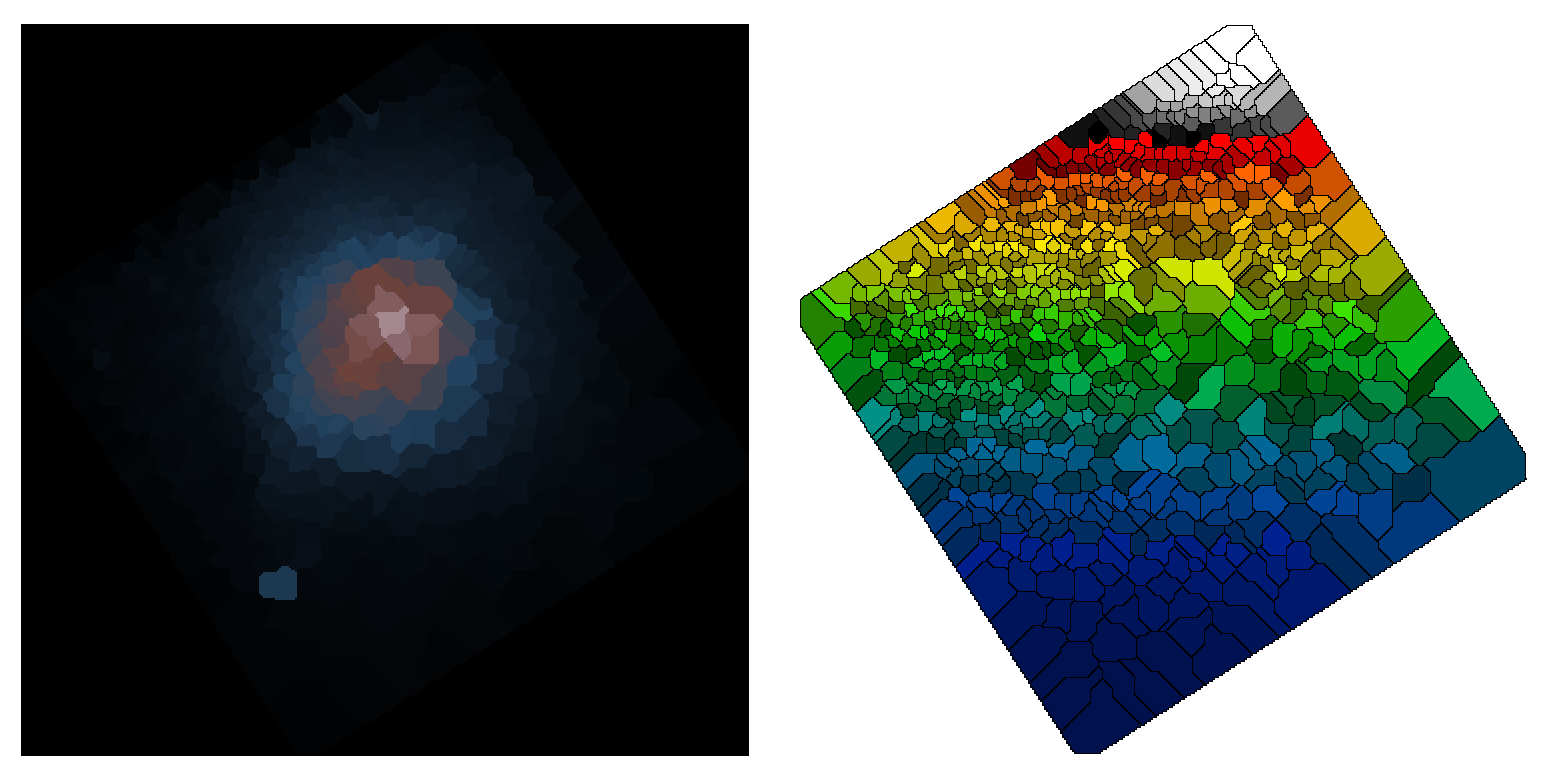

In [6]:
display_map watershed.img watershed.map watershed.png watershed.reg


The center of each of these _cells_ is a local maximum.  All pixels closest to the local maximum are grouped together.

> Note: this is the same as an unweighted Voronoi Tesselation